In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/home/kashish/Downloads/Transaction.csv")
dataset

,LeadId,Age,Gender,Income,Residence,Diabetes,HeartAilment,Hypertension,OtherIllness,SurgicalProcedure,COVID19,PolicyName
0,176,43,Male,300000,Metro,0,0,1,0,0,0,Policy_1
1,58,32,Female,300000,Non-Metro,0,0,1,0,0,0,Policy_11
2,17,29,Male,1100000,Metro,0,0,0,1,1,1,Policy_3
3,215,50,Male,300000,Metro,0,0,1,0,0,1,Policy_1
4,34,25,Male,1400000,Non-Metro,0,0,0,0,1,0,Policy_4
...,...,...,...,...,...,...,...,...,...,...,...,...
245,240,57,Male,1100000,Metro,0,0,1,0,0,0,Policy_4
246,226,51,Male,1300000,Metro,0,1,1,0,1,0,Policy_5
247,248,60,Female,1300000,Non-Metro,0,0,1,0,0,1,Policy_7
248,229,52,Female,2100000,Non-Metro,0,0,0,0,0,1,Policy_4


In [4]:
policy = dataset.iloc[:, -1]

In [5]:
dataset.drop(columns = ['PolicyName'], inplace = True)

In [6]:
dataset

,LeadId,Age,Gender,Income,Residence,Diabetes,HeartAilment,Hypertension,OtherIllness,SurgicalProcedure,COVID19
0,176,43,Male,300000,Metro,0,0,1,0,0,0
1,58,32,Female,300000,Non-Metro,0,0,1,0,0,0
2,17,29,Male,1100000,Metro,0,0,0,1,1,1
3,215,50,Male,300000,Metro,0,0,1,0,0,1
4,34,25,Male,1400000,Non-Metro,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
245,240,57,Male,1100000,Metro,0,0,1,0,0,0
246,226,51,Male,1300000,Metro,0,1,1,0,1,0
247,248,60,Female,1300000,Non-Metro,0,0,1,0,0,1
248,229,52,Female,2100000,Non-Metro,0,0,0,0,0,1


In [8]:
dataset['Gender'].replace(to_replace = ['Male', 'Female'], value = [0,1], inplace = True)

In [9]:
dataset['Residence'].replace(to_replace = ['Metro', 'Non-Metro'], value = [0,1], inplace = True)

In [12]:
X = dataset.iloc[:, 1:].values

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

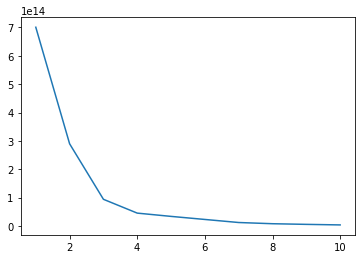

In [17]:
plt.plot(range(1, 11), wcss)
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

In [19]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [23]:
customers = pd.Series(y_means, name = 'Customers')

In [24]:
df = pd.concat([policy, customers], axis=1)

In [32]:
groups = df.groupby(by = ['Customers'])

In [34]:
first = groups.get_group(0)
second = groups.get_group(1)
third = groups.get_group(2)

(array([48.,  5., 37., 22., 25., 10., 14.,  9.,  2.,  6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

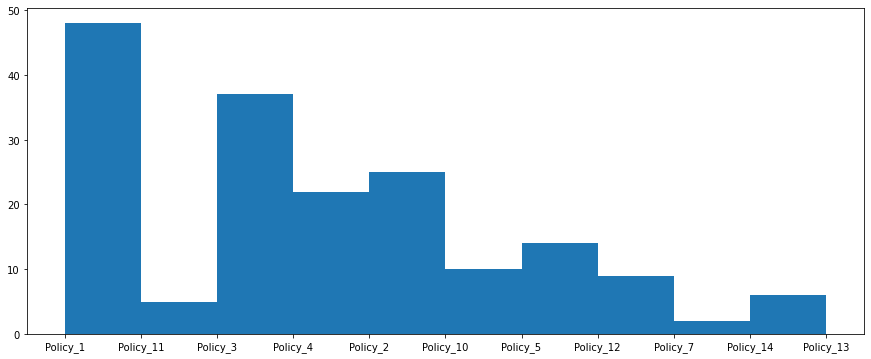

In [36]:
plt.figure(figsize = (15, 6))
plt.hist(x = first['PolicyName'])

(array([3., 0., 0., 1., 0., 0., 3., 0., 0., 2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

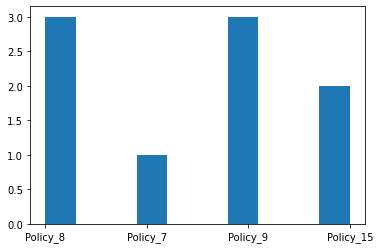

In [37]:
plt.hist(x = second['PolicyName'])

(array([ 8., 13.,  0., 11.,  0.,  2., 12.,  0.,  2., 15.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

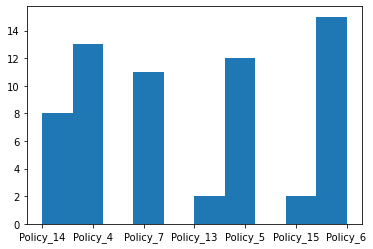

In [38]:
plt.hist(x = third['PolicyName'])